# Fully Connected NN

In [1]:
# Import functions
import setGPU0
from io_functions import *
from draw_functions import *

Using Theano backend.
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN not available)

Couldn't import dot_parser, loading of dot files will not be possible.


## Load the gammas and pi0s as nparrays of 20x20x25 event arrays

In [2]:
# Get the datasets for the first time
#signal = get_dataset('/data/vlimant/LCD/Gamma100GeV')
#bkg = get_dataset('/data/vlimant/LCD/Pi0100GeV')

# Save the datasets for faster future loading
#save_dataset("/data/vlimant/LCD/Gamma100GeV", signal)
#save_dataset("/data/vlimant/LCD/Pi0100GeV", bkg)

In [3]:
# Load the datasets
signal = load_dataset("/data/vlimant/LCD/Gamma100GeV")
bkg = load_dataset("/data/vlimant/LCD/Pi0100GeV")

## Prepare the data

In [4]:
# 1 is signal; 0 is background
train_data, test_data, train_labels, test_labels = train_test(shape=(10000,), split=0.33)

## Create and train the model

In [5]:
# Construct and compile a network
model = Sequential()
model.add(Dense(10, input_dim=10000, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [14]:
# Train the network
my_fit = model.fit(train_data, train_labels, nb_epoch=4, batch_size=100, verbose=1)

Epoch 1/4
54236/54236 [==============================] - 2s - loss: 0.6725     
Epoch 2/4
54236/54236 [==============================] - 2s - loss: 0.6609     
Epoch 3/4
54236/54236 [==============================] - 2s - loss: 0.6468     
Epoch 4/4
54236/54236 [==============================] - 2s - loss: 0.6337     


## Visualize the classification

### Classification Histogram

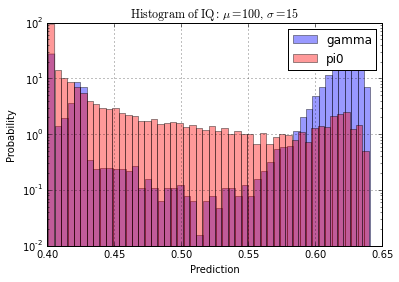

In [15]:
# Draw the classification histogram
draw_histogram(test_data, test_labels, model)

### ROC Curve

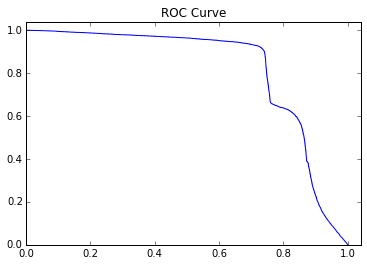

In [16]:
# Draw the roc curve
draw_roc_curve(test_data, test_labels, model)

### Loss Evolution

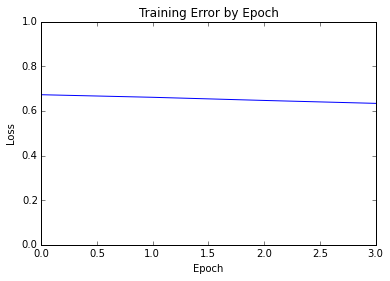

In [17]:
# Draw the loss history
draw_loss_history(my_fit)